**Importing Libraries**

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

**Data Preparation**

In [2]:

trainset = torchvision.datasets.MNIST(root = './data',train = True, download = True, transform = transforms.ToTensor())


100%|██████████| 9.91M/9.91M [00:13<00:00, 718kB/s] 
100%|██████████| 28.9k/28.9k [00:00<00:00, 122kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 936kB/s] 
100%|██████████| 4.54k/4.54k [00:00<00:00, 1.51MB/s]


In [3]:
trainset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [4]:
image,label = trainset[0]
print(image.shape)

torch.Size([1, 28, 28])


In [5]:
len(trainset)

60000

In [6]:
trainloader = torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

**Model Development**

In [7]:
class GenBlock(nn.Module):
  def __init__(self,in_features,out_features):
    super(GenBlock,self).__init__()
    self.main = nn.Sequential(
        nn.Linear(in_features,out_features),
        nn.ReLU(True)
    )

  def forward(self,x):
    return self.main(x)


In [8]:
class Generator(nn.Module):
  def __init__(self):
    super(Generator,self).__init__()
    self.main = nn.Sequential(
        GenBlock(100,256),
        GenBlock(256,512),
        GenBlock(512,1024),
        nn.Linear(1024,28*28),
        nn.Tanh()  #Transforming the values in the range of -1 and 1
    )

  def forward(self,input):
    return self.main(input).view(-1,1,28,28)


In [9]:
class DisBlock(nn.Module):
  def __init__(self,in_features,out_features):
    super(DisBlock,self).__init__()
    self.main = nn.Sequential(
        nn.Linear(in_features,out_features),
        nn.LeakyReLU(0.2,inplace=True),
        nn.Dropout(0.2)
    )

  def forward(self,x):
    return self.main(x)

In [10]:
class Discriminator(nn.Module):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.main = nn.Sequential(
        DisBlock(28*28,1024),
        DisBlock(1024,512),
        DisBlock(512,256),
        nn.Linear(256,1),
        nn.Sigmoid()

    )

  def forward(self,input):
    return self.main(input.view(-1,28*28))

**Initialization**

In [13]:
generator = Generator()
discriminator = Discriminator()

criterion = nn.BCELoss()

OptimizerG = optim.Adam(generator.parameters(),lr=0.0002)
OptimizerD = optim.Adam(discriminator.parameters(),lr=0.0002)

**Training**

Epoch [0/50] Batch 0/938             Loss D: 1.3871, Loss G: 0.6864
Epoch [0/50] Batch 100/938             Loss D: 1.6778, Loss G: 0.9745
Epoch [0/50] Batch 200/938             Loss D: 3.2929, Loss G: 0.0899
Epoch [0/50] Batch 300/938             Loss D: 1.7728, Loss G: 0.4426
Epoch [0/50] Batch 400/938             Loss D: 1.0139, Loss G: 1.2767
Epoch [0/50] Batch 500/938             Loss D: 1.5909, Loss G: 0.3171
Epoch [0/50] Batch 600/938             Loss D: 2.6015, Loss G: 0.5746
Epoch [0/50] Batch 700/938             Loss D: 0.7297, Loss G: 3.8308
Epoch [0/50] Batch 800/938             Loss D: 0.4963, Loss G: 2.1875
Epoch [0/50] Batch 900/938             Loss D: 0.4736, Loss G: 3.2186


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.31770122..0.89927113].


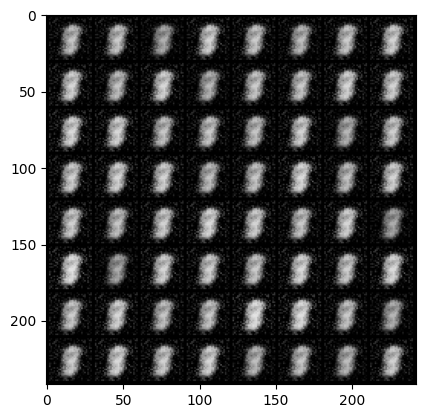

Epoch [1/50] Batch 0/938             Loss D: 3.3636, Loss G: 2.1332
Epoch [1/50] Batch 100/938             Loss D: 0.3664, Loss G: 2.5251
Epoch [1/50] Batch 200/938             Loss D: 1.7560, Loss G: 2.0813
Epoch [1/50] Batch 300/938             Loss D: 1.0115, Loss G: 0.9219
Epoch [1/50] Batch 400/938             Loss D: 0.3534, Loss G: 2.6392


KeyboardInterrupt: 

In [12]:
#Setting up the parameter and preparing the data
num_epochs = 50
fixed_noise = torch.randn(64,100)

for epoch in range(num_epochs):
  for i,(data,_) in enumerate(trainloader):
    real_data = data
    batch_size = real_data.size(0)

    #Train the discriminator
    #Generate Fake Data
    noise = torch.randn(batch_size,100)
    fake_data = generator(noise)

    label_real = torch.full((batch_size,),1,dtype=torch.float)
    label_fake = torch.full((batch_size,),0,dtype=torch.float)

    output_real = discriminator(real_data).view(-1)
    lossD_real = criterion(output_real,label_real)

    output_fake = discriminator(fake_data.detach()).view(-1)
    lossD_fake = criterion(output_fake,label_fake)

    lossD = lossD_real + lossD_fake

    OptimizerD.zero_grad()
    lossD.backward()
    OptimizerD.step()

    #Train the generator
    output_fake = discriminator(fake_data).view(-1)
    lossG = criterion(output_fake,label_real)

    OptimizerG.zero_grad()
    lossG.backward()
    OptimizerG.step()


    #Visualizing the results of training
    #Epoch [0/80] Batch 0/938                   Loss D: 1.3865, Loss G: 0.6956

    if i % 100 == 0:
      print(f'Epoch [{epoch}/{num_epochs}] Batch {i}/{len(trainloader)} \
            Loss D: {lossD.item():.4f}, Loss G: {lossG.item():.4f}')

  with torch.no_grad():
      fake_images = generator(fixed_noise).detach()
  img_grid = torchvision.utils.make_grid(fake_images)  # (Channel,Height,Width)
  np_img = img_grid.numpy()
  plt.imshow(np.transpose(np_img,(1,2,0)))  #(Height,Width,Channel)
  plt.show()